In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Various tests of normality
from scipy.stats import shapiro
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import lilliefors

# Prepare the Data

In [2]:
# Import the county election data, and the county health rankings data for 2020 and 2019.
# Store in a variabled called "df"

url = 'https://github.com/thomaspingel/geodata/raw/master/election/county_election_data_2000-2020.csv'
election_df = pd.read_csv(url,dtype={'FIPS':str})

url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/county_health_rankings/chr_2019.csv'
health_df = pd.read_csv(url,dtype={'FIPS':str})

df = health_df.merge(election_df,how='left',on='FIPS')

# Column names often have spaces.  Use this command to replace spaces with underscores
# df.columns = df.columns.str.replace(' ', '_')

df.head()

,FIPS,State,County,Premature death - Years of Potential Life Lost Rate,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (White),Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,01001,Alabama,Autauga,8824.057123,10471.252986,NaN,8706.658832,18.411124,4.200578,4.306739,...,24973.0,72.77,23.77,49.00,19838.0,7503.0,27770.0,71.44,27.02,44.42
1,01003,Alabama,Baldwin,7224.632160,10042.472874,3086.605695,7277.780727,18.060458,4.098748,4.249649,...,95215.0,76.55,19.39,57.16,83544.0,24578.0,109679.0,76.17,22.41,53.76
2,01005,Alabama,Barbour,9586.165037,11332.562909,NaN,7309.636719,25.773416,5.067438,4.634994,...,10469.0,52.10,46.53,5.57,5622.0,4816.0,10518.0,53.45,45.79,7.66
3,01007,Alabama,Bibb,11783.543675,14812.539280,NaN,11327.563749,19.996912,4.363377,4.315710,...,8819.0,76.40,21.25,55.15,7525.0,1986.0,9595.0,78.43,20.70,57.73
4,01009,Alabama,Blount,10908.101822,NaN,5619.645186,11336.046321,21.095323,4.512753,4.701599,...,25588.0,89.33,8.43,80.90,24711.0,2640.0,27588.0,89.57,9.57,80.00


In [3]:
print(df.columns.values)

['FIPS' 'State' 'County'
 'Premature death - Years of Potential Life Lost Rate'
 'Premature death - YPLL Rate (Black)'
 'Premature death - YPLL Rate (Hispanic)'
 'Premature death - YPLL Rate (White)' 'Poor or fair health - % Fair/Poor'
 'Poor physical health days - Physically Unhealthy Days'
 'Poor mental health days - Mentally Unhealthy Days'
 'Low birthweight - Unreliable' 'Low birthweight - % LBW'
 'Low birthweight - % LBW (Black)' 'Low birthweight - % LBW (Hispanic)'
 'Low birthweight - % LBW (White)' 'Adult smoking - % Smokers'
 'Adult obesity - % Obese'
 'Food environment index - Food Environment Index'
 'Physical inactivity - % Physically Inactive'
 'Access to exercise opportunities - % With Access'
 'Excessive drinking - % Excessive Drinking'
 'Alcohol-impaired driving deaths - # Alcohol-Impaired Driving Deaths'
 'Alcohol-impaired driving deaths - # Driving Deaths'
 'Alcohol-impaired driving deaths - % Alcohol-Impaired'
 'Sexually transmitted infections - # Chlamydia Cases'
 'S

# Part 1 - Exploring Transformations of Data

**Transformations are a useful way to take data that is skewed and de-skew it so that it performs better in a regression model (i.e., is more predictive).**

_Log transforms_ are a useful way to transform data when
* data values are positive AND
* data values are skewed right (i.e., clustered heavily to the left)

If data seem clustered left BUT they are not positive, you can add a value to recenter the distribution

_Arithmetic and power transforms are also useful._
One can also raise the values to a power, either greater than one (e.g., the square or second power) or between zero and 1 (e.g., square root or .5 power)

---

<u>Instructions</u>: Using the codeblock below, explore ten different likely contributors to the prediction model to see if they likely require transformation before inclusion.  Use the histograms to visually diagnose how normal they appear.  While nothing will be completely normal, does it have a general "bell" shape, or is it bunched up at one end or the other.  If it's bunched up toward the left, that's a "right skew" as it has a longer right "tail".  If you need to review concepts of skew, please see the [statisticshowto.com page and video on skew](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/).  Indicators of skew should use weak/moderate/strong left/right skew.

Paste your best transform code (everything to the right of the equals sign) into the markdown table.  Please order variables alphabetically (manually).  Two of these have been done for you.

| Variable | Untransformed skew | Transform | 
| ----------- | ---- | ----------- |
| Demographics - Population   | Strong Right | np.log(x) |
| gop_minus_dem_prc_2016 | Moderate Left | (x + 100) ** 2 | 

Untransformed:  ShapiroResult(statistic=0.9448776245117188, pvalue=1.2324848148756475e-32)
Transformed: ShapiroResult(statistic=0.9835274815559387, pvalue=1.4194902178092533e-18)


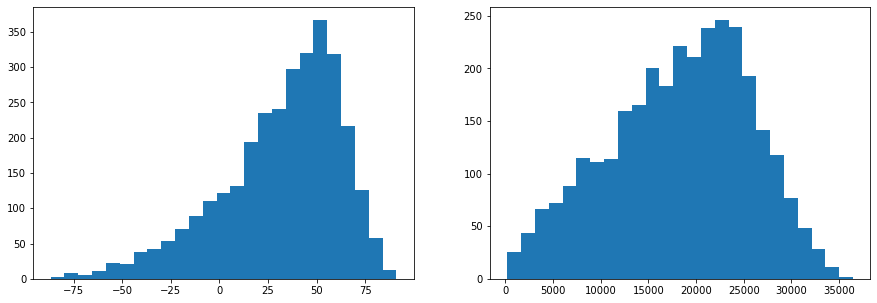

In [12]:
# Edit this line to choose a variable from the list above
x = df['gop_minus_dem_prc_2016'].dropna()

# And modify this line to the right of the equal sign to make a transformation.
# Options include a log transform, and adding a value and/or raising to a positive exponent.
# Example: xt = np.log(x)
# Example: xt = (x + 100) ** 1.4
xt = np.log(x)

plt.figure(figsize=(15,5))
plt.subplot(121)
_ = plt.hist(x,bins=25)
plt.subplot(122)
_ = plt.hist(xt,bins=25)

# Statistical tests of normality
# If the P-Value is less than .05, the data are not normal
# Graduate students should pay attention to these values and understand their import
print('Untransformed: ',shapiro(x))
print('Transformed:',shapiro(xt))

# Part 2 - Test variables one at a time for R<sup>2</sup> value

<u>Instructions</u> - Using the variables and transformation methods you've aggregated above, run each variable twice - first untransformed, then transformed in the way you specified above - and put the results in this table, sorted (manually) by R2 or Transformed R2 score, whichever is higher (use the highest score as that line's score).  Include a VERY short statement indicating the logic of inclusion in the model.  Add a markdown paragraph below this table, and explain what variables are worth including in the model.

| Variable | R<sup>2</sup> | R<sup>2</sup><sub>trans</sub> | Rationale |
| ----------- | :---- | :-----| ----------:| 
| gop_minus_dem_prc_2016 | 0.975 | 0.956 | States are likely to vote like they did recently |
| Demographics - Population   | 0.127 | 0.294 | Larger states are more likely to vote Democrat |

In [17]:
_df = pd.DataFrame()

_df['y'] = df['gop_minus_dem_prc_2020']

# Edit this value, first as just the column, and again using the transformation you picked above
_df['x'] = np.log(df['Demographics - Population'])

_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          3.49e-237
Time:                        11:53:39   Log-Likelihood:                -14672.
No. Observations:                3114   AIC:                         2.935e+04
Df Residuals:                    3112   BIC:                         2.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.0929      3.382     44.976      0.0

# Part 3 - Multiple Regression Round 1 - Investigate interaction effects

<u>Instructions</u> - Choose 3 or 4 of the highest scoring variables (some discretion is OK here), and include them in a model with with full interaction effects.  Express the models as either untransformed values or transformed values if you think the transformation <u>significantly</u> improves the explanatory power.  Review the output, and use the by variable/interaction report to fill in the table for all interactions tested.  If the value is under p < .05, the interaction is statistically significant:

| Variables | Result
| --------- | -------
| x0 | Example: Statistically Significant
| x1 | Example: Not Statistically Significant
| x2 | ???
| x0 and x1 | ???
| x0 and x2 | ???
| x1 and x2 | ???
| x0 and x1 and x2 | ???

In [18]:
_df = pd.DataFrame()

_df['y'] = df['gop_minus_dem_prc_2020']

_df['x0'] = df['gop_minus_dem_prc_2016']
_df['x1'] = df['Demographics - Population']
_df['x2'] = df['Sexually transmitted infections - Chlamydia Rate']

_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x0 * x1 * x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.722e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:54:18   Log-Likelihood:                -8902.1
No. Observations:                2963   AIC:                         1.782e+04
Df Residuals:                    2955   BIC:                         1.787e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1860      0.290     -4.088      0.0

# Part 4 - Multiple Regression

<u>Instructions</u> - Use all of the above information to construct a final model with individual and interaction terms, as needed and dictated by an analysis of the resulting p-values.  You'll need to edit your model and formula, rerun several times adding and removing terms as dictated by the p-values, and then step though the crosstabulation code below.  No editing of any codebock other than the one directly beneath these instructions should be required.

In [ ]:
_df = pd.DataFrame()

_df['y'] = df['gop_minus_dem_prc_2020']

_df['x0'] = df['variable1']
_df['x1'] = df['variable2']
_df['x2'] = df['variable3']

_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x0 + x1 + x2 + x0:x1 + x1:x2 + x0:x1:x2',data=_df).fit()

# Print the report
print(results.summary())

In [ ]:
# Constuct a dataframe of the confusion matrix, calculated with pandas.crosstab
# Here, only binary options are considered (R wins or D wins, not percent victory)

output_df = pd.DataFrame({'true':df['gop_minus_dem_prc_2020']>0,'predicted':results.fittedvalues>0})
output_df['true'] = output_df['true'].map({True:'R',False:'D'})
output_df['predicted'] = output_df['predicted'].map({True:'R',False:'D'})
cross = pd.crosstab(output_df.true,output_df.predicted)
print(cross)

In [ ]:
# Show the normalized values (percents)

cross = pd.crosstab(output_df.true,output_df.predicted,normalize=True)
cross

In [ ]:
# How accurate was the total model at predicting R/D victory

100 * (cross.values[0,0] + cross.values[1,1])

# Part 5 - Write up

<u>Instructions</u> - Write a short paragraph in a markdown cell explaining what you learned about regression, and about 
predicting 2016 election results.  Name 5 more variables not included in these datasets that you think might be helpful in predicting the results.  These variables should be operationally valid - meaning, one could easily imagine that such data exist.  When complete, render this notebook as a PDF via notebook-as-pdf, by exporting (File -> Download As -> PDF via HTML)